# **Forest Fire Prediction**
#### by Yevgenia Zalkind

### Part 1: Data acquisition
The Data Acquisition part is responsible for retrieving data from a specific source, in our case - retrieving wild fires locations data using a crawling mechanism from the `NIFC - National Interagency Fire Center` website.

#### Imports section:

In [1]:
# Please note if running on a clean environment, need to install missing modules
import pandas as pd
from bs4 import BeautifulSoup
import time 
from random import randint
import requests  
from selenium import webdriver 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 

#### Global variables:

In [2]:
# The URL we are using is point locations for all wild land fires in the United States reported by the IRWIN system
URL = 'https://data-nifc.opendata.arcgis.com/datasets/nifc::wildland-fire-incident-locations/explore?showTable=true'
CSV_NAME = 'fire_history.csv'

#### Retrieve page content and save as CSV:
*We are retrieving the page content by sending our URL to the `get_page_source_after_scroll` function which uses the `scroll_down_element` function that is designed to scroll down a web page using Selenium. Then with the help of the `read_table_and_save_to_csv` function, we can save our content to a CSV file.*

In [3]:
def scroll_down_element(driver, element):
    # Get current page height
    current_height= driver.execute_script("return arguments[0].scrollHeight",element)

    while True: 
        # Scroll to the bottom of the page
        driver.execute_script("arguments[0].scrollTo(0, arguments[0].scrollHeight);", element)
        
        time.sleep(randint(1, 5))  # Wait for some time to let the page load new content

        # Get the new height after scrolling
        new_height = driver.execute_script("return arguments[0].scrollHeight", element)

        if new_height == current_height:  # Check if the page height has remained the same
            table_info = driver.find_element(by=By.CLASS_NAME, value='feature-table-count').text.split()
            if table_info[1] == table_info[3]:
                print("found {} from {}".format(table_info[1], table_info[3]))
                break # We reached the end

            else:  # Check if the page is still loading and make sure it didn't crash
                try:
                    #driver.find_element(by=By.CLASS_NAME, value='loader') 
                    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'loader')))
                except:
                    driver.execute_script("arguments[0].scrollTo(0, 0);", element)
                    time.sleep(randint(1, 5))

        current_height = new_height

In [4]:
def get_page_source_after_scroll(url):
    driver = webdriver.Chrome()  # Initialize the WebDriver
    driver.get(url)  # Load the webpage
    time.sleep(10)
    if (requests.get(url).status_code == 200):
        element = driver.find_element(by=By.CLASS_NAME, value='infinite-scroll-container')
        scroll_down_element(driver, element)
    else:
        print("Error - Failed to retrieve page source")
    driver.quit()  # Quit the WebDriver to clean up resources
    return driver.page_source  # Return the page source after scrolling

In [5]:
def read_table_and_save_to_csv(page_source):
    # Create a BeautifulSoup object with the page source
    soup = BeautifulSoup(page_source, 'html.parser')
    table = soup.find('table')  # Find the table element on the page

    # Extract the table data into a list of lists
    table_data = [] 
    for row in table.find_all('tr'):
        row_data = [cell.get_text(strip=True) for cell in row.find_all('td')]
        table_data.append(row_data)

    df = pd.DataFrame(table_data)  # Create a DataFrame from the table data
    df.to_csv(CSV_NAME, index=False)  # Save the DataFrame to a CSV file

#### Implementation section:

In [ ]:
page_content = get_page_source_after_scroll(URL)
read_table_and_save_to_csv(page_content)

#### Exploration section:
*Let's see how our data is looking.*

In [6]:
df = pd.read_csv(CSV_NAME)
df

C:\Users\jenza\AppData\Local\Temp\ipykernel_32008\799376281.py:1: DtypeWarning: Columns (6,7,15,16,34,63,66,70,71,79,87,88,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(CSV_NAME)


,X,Y,OBJECTID,SourceOID,ABCDMisc,ADSPermissionState,ContainmentDateTime,ControlDateTime,CreatedBySystem,IncidentSize,...,EstimatedFinalCost,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,IsCpxChild,CpxName,CpxID,SourceGlobalID,GlobalID
0,-118.180712,33.808985,1,7747595,NaN,DEFAULT,NaN,NaN,lacocad,NaN,...,NaN,NaN,NaN,2020/02/28 20:52:36.363+00,2020/02/28 20:52:36.363+00,0,NaN,NaN,{6A311ABB-DF4F-4947-B8DD-3900BDA784F6},48d2c0e2-5e38-4d40-9d5e-066b076c7d98
1,-117.153901,33.176394,2,6384391,NaN,DEFAULT,NaN,NaN,firecode,NaN,...,NaN,NaN,NaN,2019/07/01 20:10:12.737+00,2019/07/01 20:10:12.737+00,0,NaN,NaN,{1AF2C949-B159-4D8F-8D39-90CB58BC5DD5},17d2d66a-d451-4592-a172-7b2c860a2cc9
2,-121.104180,38.834727,3,1383752,NaN,DEFAULT,NaN,NaN,firecode,NaN,...,NaN,NaN,NaN,2016/06/20 22:39:02.410+00,2016/06/20 22:39:02.410+00,0,NaN,NaN,{1B179EA1-97CE-4699-915B-374754BCBC5B},60c471ff-3c85-41b4-9135-e7338d7ec90b
3,-117.228592,33.782442,4,22499589,NaN,DEFAULT,NaN,NaN,cfcad,NaN,...,NaN,NaN,NaN,2021/11/25 15:24:53.120+00,2021/11/25 15:24:53.120+00,0,NaN,NaN,{E61E387B-4ED7-4971-9604-C5D7391FAF77},149237ec-a42e-43d6-9318-22207a705dd9
4,-118.309032,33.941815,5,23869477,NaN,DEFAULT,NaN,NaN,lacocad,NaN,...,NaN,NaN,NaN,2022/11/21 11:28:49.097+00,2022/11/21 11:28:49.097+00,0,NaN,NaN,{AEB6F7A3-A109-4132-9FEB-FB1EE1DF3193},ef7675e3-d5be-412a-a6c1-0d63fc7153c8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263817,-116.073913,43.243246,315324,28035649,NaN,FIREREPORTING,2023/05/20 19:06:00+00,2023/05/20 19:06:00+00,wildcad,0.50,...,NaN,NaN,NaN,2023/06/19 16:23:18.380+00,2023/06/19 16:26:42.300+00,0,NaN,NaN,{1553284C-4F2F-4D1E-8DFF-77F4593289FE},32553b11-17d3-405a-82ff-1cfbdfa6492e
263818,-116.026013,43.184536,315326,28035650,NaN,FIREREPORTING,2023/05/20 19:33:00+00,2023/05/20 19:33:00+00,wildcad,0.50,...,NaN,NaN,NaN,2023/06/19 16:28:15.883+00,2023/06/19 16:28:37.680+00,0,NaN,NaN,{2957B1E7-485A-4BE8-8914-2EEAD0823DF3},09c8f1ca-6e1f-4438-b929-55488216cb74
263819,-116.069113,43.241006,315327,28035652,NaN,FIREREPORTING,2023/05/20 23:30:00+00,2023/05/20 23:30:00+00,wildcad,20.00,...,NaN,NaN,NaN,2023/06/19 16:35:53.457+00,2023/06/19 16:36:22.327+00,0,NaN,NaN,{B0A31C1B-638A-4FBC-AF6F-E8BAC9DFCED5},72a22987-ba12-414c-9b8e-63eaa2587dd9
263820,-151.187739,60.447151,315328,28035653,NaN,DEFAULT,2023/06/19 08:19:42+00,2023/06/19 08:37:23+00,ifm,0.10,...,NaN,NaN,NaN,2023/06/19 16:40:37.620+00,2023/06/19 16:44:40.917+00,0,NaN,NaN,{F8490B1B-82F1-4851-8386-F121978FE268},197b872b-1932-46aa-a7e6-628097227187


In [8]:
print('DataFrame information:')
df.info()
print()
print('DataFrame description:')
df.describe(include='all')

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263822 entries, 0 to 263821
Data columns (total 96 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   X                                263822 non-null  float64
 1   Y                                263822 non-null  float64
 2   OBJECTID                         263822 non-null  int64  
 3   SourceOID                        263822 non-null  int64  
 4   ABCDMisc                         13347 non-null   object 
 5   ADSPermissionState               263822 non-null  object 
 6   ContainmentDateTime              158269 non-null  object 
 7   ControlDateTime                  141929 non-null  object 
 8   CreatedBySystem                  263822 non-null  object 
 9   IncidentSize                     186120 non-null  float64
 10  DiscoveryAcres                   197376 non-null  float64
 11  DispatchCenterID                 226444 no

,X,Y,OBJECTID,SourceOID,ABCDMisc,ADSPermissionState,ContainmentDateTime,ControlDateTime,CreatedBySystem,IncidentSize,...,EstimatedFinalCost,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,IsCpxChild,CpxName,CpxID,SourceGlobalID,GlobalID
count,263822.000000,263822.000000,263822.000000,2.638220e+05,13347,263822,158269,141929,263822,1.861200e+05,...,1.882000e+03,2003,1880,263822,263822,263822.000000,653,653,263822,263822
unique,NaN,NaN,NaN,NaN,512,4,134520,116030,17,NaN,...,NaN,5,1880,262483,263750,NaN,96,96,263806,263822
top,NaN,NaN,NaN,NaN,EKV5,DEFAULT,2020/12/31 18:00:00+00,2020/12/31 18:00:00+00,wildcad,NaN,...,NaN,Type 4 Incident,2022/10/24 23:37:21+00,2020/01/27 19:36:33.193+00,2022/11/16 22:48:48.410+00,NaN,AUGUST COMPLEX,{EE343B88-0ADB-4C25-B744-6B4CE9DCC6DA},{CD61DE89-6D05-4056-82F3-3C24A91D1B8C},48d2c0e2-5e38-4d40-9d5e-066b076c7d98
freq,NaN,NaN,NaN,NaN,529,210195,137,136,135870,NaN,...,NaN,852,1,5,29,NaN,41,41,2,1
mean,-108.972841,40.020878,148962.076176,1.169931e+07,NaN,NaN,NaN,NaN,NaN,4.550511e+02,...,6.248690e+06,NaN,NaN,NaN,NaN,0.002433,NaN,NaN,NaN,NaN
std,14.262137,6.339502,92327.781085,9.373173e+06,NaN,NaN,NaN,NaN,NaN,8.056212e+03,...,2.557653e+07,NaN,NaN,NaN,NaN,0.049270,NaN,NaN,NaN,NaN
min,-176.645294,13.380717,1.000000,5.009160e+05,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,-118.311680,34.637724,65977.250000,3.338407e+06,NaN,NaN,NaN,NaN,NaN,1.000000e-01,...,1.250000e+05,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
50%,-112.035261,39.387641,145334.500000,7.606048e+06,NaN,NaN,NaN,NaN,NaN,3.000000e-01,...,7.461500e+05,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
75%,-100.660843,44.760283,229138.750000,2.130120e+07,NaN,NaN,NaN,NaN,NaN,5.000000e+00,...,3.200000e+06,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN


### Part 2: Data handling
In this section, we will focus on cleaning the raw data to ensure its quality and consistency. Data cleaning is an essential step in the data preprocessing pipeline, as it helps to eliminate errors, handle missing values, and transform the data into a suitable format for analysis.

Data handling stages:
- Handling Missing Values
- Handling Duplicates
- Data Conversion
- Outliers and Validations

#### Imports section: (and warning exception handling)

In [1]:
# Please note if running on a clean environment, need to install missing modules
import pandas as pd
import numpy as np
import reverse_geocoder as rg
pd.options.mode.chained_assignment = None

#### Global variables:

In [2]:
# We are creating a new CSV file in each stage to minimize data loss if accrues 
CSV_NAME = 'fire_history.csv'
COLS_RED_CSV = 'fire_history_cols_reduction.csv'
MISS_CSV = 'fire_history_miss_values_removed.csv'
DUP_CSV = 'fire_history_dup_values_removed.csv'
DATA_CONV_CSV = 'fire_history_data_conv.csv'
ADD_COLS_CSV = 'fire_history_additional.csv'
CSV_OUTLIERS = 'fire_history_outliers_removed.csv'
#CSV_VALIDATION = 'fire_history_validation.csv'

FINAL_AFTER_PREP_CSV = 'fire_history_prep.csv'

COLS = ['UniqueFireIdentifier', 'FireDiscoveryDateTime', 'FireOutDateTime', 'InitialLatitude', 'InitialLongitude', 'POOCounty', 'FireCause']

#### Removing unnecessary columns:

In [3]:
def keep_necessary_columns(df, cols):
    df_cleaned = df[cols]
    return df_cleaned

#### Handling missing values:
*The `handle_missing_values()` function is used to fill in missing values in the `FireCause` column before removing all rows with missing values.*

In [4]:
def handle_missing_values(df):
    df_cleaned = df.copy()
    df_cleaned['FireCause'].fillna('Undetermined', inplace=True)
    df_cleaned.dropna(inplace=True, ignore_index=True)
    return df_cleaned

#### Removing duplicates:
*We are using `UniqueFireIdentifier` column to identify duplicates. Unique identifier assigned to each wildland fire.  yyyy = calendar year, SSUUUU = POO protecting unit identifier (5 or 6 characters), xxxxxx = local incident identifier (6 to 10 characters)*

In [5]:
def duplicated_values(df):
    df_cleaned = df.copy()
    df_cleaned.drop_duplicates(subset='UniqueFireIdentifier', keep='first', inplace=True)
    return df_cleaned

#### Data Type Conversion:
*The `convert_date()` function converts dates into a useable format for our API and handles `pandas.to_datetime` limitations and human errors when entering data.*

In [6]:
def convert_date(dates):
    for i in range(len(dates)):
        try:
            dates[i] = pd.to_datetime(dates[i]).date()
        except:
            dates[i] = np.nan
    return dates

*The `data_conversion()` function converts our date columns to a usable format, and converts the `FireCause` column to a categorical column using `.map(cause_mapping)`.*

In [24]:
def data_conversion(df):
    df_cleaned = df.copy()

    # Convert FireDiscoveryDateTime and FireOutDateTime to useable format and remove missing values after conversion
    df_cleaned['FireDiscoveryDateTime'] = convert_date(df_cleaned['FireDiscoveryDateTime'])
    df_cleaned['FireOutDateTime'] = convert_date(df_cleaned['FireOutDateTime'])
    df_cleaned.dropna(inplace=True, ignore_index=True)

    # Convert FireCause to categorical column
    cause_mapping = {'Human': 1, 'Natural': 2, 'Unknown': 3, 'Undetermined': 4}
    df_cleaned['FireCause'] = df_cleaned['FireCause'].map(cause_mapping)

    return df_cleaned

#### Extras:
*The `calc_days()` function calculates the difference in days between two dates.*

In [8]:
def calc_days(end_dates, start_dates):
    days = []
    for i in range(len(end_dates)):
        end_date = end_dates[i]
        start_date = start_dates[i]
        days.append((end_date - start_date).days)
    return days

*The `additional_cols()` functions adds two additional useful columns to the DataFrame.*

In [9]:
def additional_cols(df):
    df_extra = df.copy()

    # Add FireDuration column
    df_extra['FireDuration'] = calc_days(df_extra['FireOutDateTime'], df_extra['FireDiscoveryDateTime'])

    # Add CausedByWeather column
    df_extra['CausedByWeather'] = df_extra['FireCause'].apply(lambda x: 1 if x == 2 else 0)

    return (df_extra)

#### Validation and Detecting Outliers:
*The `remove_outliers()` function is used to remove rows from a DataFrame based on a given boolean mask of outliers.*

In [10]:
def remove_outliers(df, outliers):
    df = df[~np.array(outliers)]
    df.reset_index(drop=True, inplace=True)
    return df

*The `duration_outliers` function ensures there are no negative duration values, and the `calculate_outliers()` function calculates outliers based on the IQR range. The IQR is less sensitive to extreme values and can handle non-normal distributions.*

In [11]:
def duration_outliers(dur):
    outliers = []
    for d in dur:
        if d < 0:
            outliers.append(True)
        else:
            outliers.append(False)
    return outliers

In [26]:
def calculate_outliers(data):
    outliers = []
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    for x in data:
        if x < lower_bound or x > upper_bound:
            outliers.append(True)
        else:
            outliers.append(False)
    return outliers

*The `coordinates_outliers()` and `valid_locations()` functions ensure that the coordinates are in range and valid.*

In [13]:
def coordinates_outliers(lats, longs):
    outliers = []
    for i in range(len(lats)):
        lat = lats[i]
        long = longs[i]
        if lat == 0 or long == 0:
            outliers.append(True)
        elif lat < -90 or lat > 90 or long < -180 or long > 180:
            outliers.append(True)
        else:
            outliers.append(False)
    return outliers

In [29]:
def valid_locations(valid_results, counties):
    for i in range(len(valid_results)):
        county = counties[i].lower()
        valid_county = valid_results[i]['admin2']
        valid_country = valid_results[i]['cc']

        if valid_county is None or county not in valid_county.lower() or valid_country != 'US':
            counties[i] = np.nan
            
    return counties 

*And FINALLY - The `handle_outliers()` and `validate_data()` functions that are responsible for handling outliers and validating data in the given DataFrame.*

In [15]:
def handle_outliers(df):
    df_cleaned = df.copy()

    # Analyze fire duration values
    fire_duration_outliers = duration_outliers(df_cleaned['FireDuration'])
    df_cleaned = remove_outliers(df_cleaned, fire_duration_outliers)
    fire_duration_IQR_outliers = calculate_outliers(df_cleaned['FireDuration'])  
    df_cleaned = remove_outliers(df_cleaned, fire_duration_IQR_outliers)

    # Analyze coordinates values
    fire_coordinates_outliers = coordinates_outliers(df_cleaned['InitialLatitude'], df_cleaned['InitialLongitude'])
    df_cleaned = remove_outliers(df_cleaned, fire_coordinates_outliers)

    return df_cleaned

In [16]:
def validate_data(df):
    valid_df = df.copy()

    lats = valid_df['InitialLatitude'].to_list()
    longs = valid_df['InitialLongitude'].to_list()
    coords = list(zip(lats, longs))

    # Analyze location values
    results = rg.search(coords)
    valid_df['POOCounty'] = valid_locations(results, valid_df['POOCounty'])
    valid_df.dropna(inplace=True, ignore_index=True)

    return valid_df

### Implementation section:
Out data before any handling and preparations

In [17]:
df = pd.read_csv(CSV_NAME)
df

C:\Users\jenza\AppData\Local\Temp\ipykernel_32220\799376281.py:1: DtypeWarning: Columns (6,7,15,16,34,63,66,70,71,79,87,88,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(CSV_NAME)


,X,Y,OBJECTID,SourceOID,ABCDMisc,ADSPermissionState,ContainmentDateTime,ControlDateTime,CreatedBySystem,IncidentSize,...,EstimatedFinalCost,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,IsCpxChild,CpxName,CpxID,SourceGlobalID,GlobalID
0,-118.180712,33.808985,1,7747595,NaN,DEFAULT,NaN,NaN,lacocad,NaN,...,NaN,NaN,NaN,2020/02/28 20:52:36.363+00,2020/02/28 20:52:36.363+00,0,NaN,NaN,{6A311ABB-DF4F-4947-B8DD-3900BDA784F6},48d2c0e2-5e38-4d40-9d5e-066b076c7d98
1,-117.153901,33.176394,2,6384391,NaN,DEFAULT,NaN,NaN,firecode,NaN,...,NaN,NaN,NaN,2019/07/01 20:10:12.737+00,2019/07/01 20:10:12.737+00,0,NaN,NaN,{1AF2C949-B159-4D8F-8D39-90CB58BC5DD5},17d2d66a-d451-4592-a172-7b2c860a2cc9
2,-121.104180,38.834727,3,1383752,NaN,DEFAULT,NaN,NaN,firecode,NaN,...,NaN,NaN,NaN,2016/06/20 22:39:02.410+00,2016/06/20 22:39:02.410+00,0,NaN,NaN,{1B179EA1-97CE-4699-915B-374754BCBC5B},60c471ff-3c85-41b4-9135-e7338d7ec90b
3,-117.228592,33.782442,4,22499589,NaN,DEFAULT,NaN,NaN,cfcad,NaN,...,NaN,NaN,NaN,2021/11/25 15:24:53.120+00,2021/11/25 15:24:53.120+00,0,NaN,NaN,{E61E387B-4ED7-4971-9604-C5D7391FAF77},149237ec-a42e-43d6-9318-22207a705dd9
4,-118.309032,33.941815,5,23869477,NaN,DEFAULT,NaN,NaN,lacocad,NaN,...,NaN,NaN,NaN,2022/11/21 11:28:49.097+00,2022/11/21 11:28:49.097+00,0,NaN,NaN,{AEB6F7A3-A109-4132-9FEB-FB1EE1DF3193},ef7675e3-d5be-412a-a6c1-0d63fc7153c8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263817,-116.073913,43.243246,315324,28035649,NaN,FIREREPORTING,2023/05/20 19:06:00+00,2023/05/20 19:06:00+00,wildcad,0.50,...,NaN,NaN,NaN,2023/06/19 16:23:18.380+00,2023/06/19 16:26:42.300+00,0,NaN,NaN,{1553284C-4F2F-4D1E-8DFF-77F4593289FE},32553b11-17d3-405a-82ff-1cfbdfa6492e
263818,-116.026013,43.184536,315326,28035650,NaN,FIREREPORTING,2023/05/20 19:33:00+00,2023/05/20 19:33:00+00,wildcad,0.50,...,NaN,NaN,NaN,2023/06/19 16:28:15.883+00,2023/06/19 16:28:37.680+00,0,NaN,NaN,{2957B1E7-485A-4BE8-8914-2EEAD0823DF3},09c8f1ca-6e1f-4438-b929-55488216cb74
263819,-116.069113,43.241006,315327,28035652,NaN,FIREREPORTING,2023/05/20 23:30:00+00,2023/05/20 23:30:00+00,wildcad,20.00,...,NaN,NaN,NaN,2023/06/19 16:35:53.457+00,2023/06/19 16:36:22.327+00,0,NaN,NaN,{B0A31C1B-638A-4FBC-AF6F-E8BAC9DFCED5},72a22987-ba12-414c-9b8e-63eaa2587dd9
263820,-151.187739,60.447151,315328,28035653,NaN,DEFAULT,2023/06/19 08:19:42+00,2023/06/19 08:37:23+00,ifm,0.10,...,NaN,NaN,NaN,2023/06/19 16:40:37.620+00,2023/06/19 16:44:40.917+00,0,NaN,NaN,{F8490B1B-82F1-4851-8386-F121978FE268},197b872b-1932-46aa-a7e6-628097227187


Keeping only necessary columns

In [18]:
df = keep_necessary_columns(df, COLS)
df.to_csv(COLS_RED_CSV, index=False)
df

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause
0,2020-CALAC-066100,2020/02/28 20:45:40+00,NaN,33.808980,-118.180700,Los Angeles,Unknown
1,2019-CAMVU-009269,2019/07/01 19:54:00+00,NaN,NaN,NaN,San Diego,NaN
2,2016-CANEU-014375,2016/06/20 22:06:00+00,NaN,NaN,NaN,Placer,NaN
3,2021-CARRU-163915,2021/11/25 15:17:33+00,NaN,33.782437,-117.228580,Riverside,Undetermined
4,2022-CALAC-396331,2022/11/21 11:25:34+00,NaN,33.941810,-118.309020,Los Angeles,Undetermined
...,...,...,...,...,...,...,...
263817,2023-IDIDNG-000356,2023/05/20 18:30:00+00,2023/05/20 19:06:00+00,43.243240,-116.073900,Ada,Human
263818,2023-IDIDNG-000357,2023/05/20 19:15:00+00,2023/05/20 19:33:00+00,43.184530,-116.026000,Ada,Human
263819,2023-IDIDNG-000358,2023/05/20 20:28:00+00,2023/05/20 23:30:00+00,43.241000,-116.069100,Ada,Human
263820,2023-AKKKS-303132,2023/06/19 05:14:10+00,NaN,60.447150,-151.187717,Kenai Peninsula,Human


Handling missing data <br> *(replacing what we can and deleting data we cannot repair)*

In [19]:
df = handle_missing_values(df)
df.to_csv(MISS_CSV, index=False)
df

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause
0,2022-MTCRA-220737,2022/09/19 06:08:00+00,2022/11/07 18:05:00+00,45.62299,-107.46470,Big Horn,Undetermined
1,2022-COUMA-000926,2022/08/09 21:32:00+00,2022/08/15 20:39:00+00,37.17861,-108.88910,Montezuma,Natural
2,2022-LASBR-000250,2022/12/10 01:09:19+00,2022/12/11 19:30:00+00,29.86160,-93.77264,Cameron,Undetermined
3,2022-WAMSF-000348,2022/09/02 20:08:00+00,2022/12/16 21:13:00+00,47.63933,-121.60540,King,Undetermined
4,2022-WACOF-001050,2022/04/14 17:30:00+00,2023/01/12 16:30:00+00,48.55950,-119.06330,Okanogan,Undetermined
...,...,...,...,...,...,...,...
126749,2023-IDIDNG-000355,2023/05/19 00:08:00+00,2023/05/19 00:16:00+00,43.19766,-116.03630,Ada,Human
126750,2023-IDIDNG-000356,2023/05/20 18:30:00+00,2023/05/20 19:06:00+00,43.24324,-116.07390,Ada,Human
126751,2023-IDIDNG-000357,2023/05/20 19:15:00+00,2023/05/20 19:33:00+00,43.18453,-116.02600,Ada,Human
126752,2023-IDIDNG-000358,2023/05/20 20:28:00+00,2023/05/20 23:30:00+00,43.24100,-116.06910,Ada,Human


Removing duplicates

In [20]:
df = duplicated_values(df)
df.to_csv(DUP_CSV, index=False)
df

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause
0,2022-MTCRA-220737,2022/09/19 06:08:00+00,2022/11/07 18:05:00+00,45.62299,-107.46470,Big Horn,Undetermined
1,2022-COUMA-000926,2022/08/09 21:32:00+00,2022/08/15 20:39:00+00,37.17861,-108.88910,Montezuma,Natural
2,2022-LASBR-000250,2022/12/10 01:09:19+00,2022/12/11 19:30:00+00,29.86160,-93.77264,Cameron,Undetermined
3,2022-WAMSF-000348,2022/09/02 20:08:00+00,2022/12/16 21:13:00+00,47.63933,-121.60540,King,Undetermined
4,2022-WACOF-001050,2022/04/14 17:30:00+00,2023/01/12 16:30:00+00,48.55950,-119.06330,Okanogan,Undetermined
...,...,...,...,...,...,...,...
126749,2023-IDIDNG-000355,2023/05/19 00:08:00+00,2023/05/19 00:16:00+00,43.19766,-116.03630,Ada,Human
126750,2023-IDIDNG-000356,2023/05/20 18:30:00+00,2023/05/20 19:06:00+00,43.24324,-116.07390,Ada,Human
126751,2023-IDIDNG-000357,2023/05/20 19:15:00+00,2023/05/20 19:33:00+00,43.18453,-116.02600,Ada,Human
126752,2023-IDIDNG-000358,2023/05/20 20:28:00+00,2023/05/20 23:30:00+00,43.24100,-116.06910,Ada,Human


Converting data to needed types and formats

In [23]:
df = data_conversion(df)
df.to_csv(DATA_CONV_CSV, index=False)
df

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause
0,2022-MTCRA-220737,2022-09-19,2022-11-07,45.62299,-107.46470,Big Horn,4
1,2022-COUMA-000926,2022-08-09,2022-08-15,37.17861,-108.88910,Montezuma,2
2,2022-LASBR-000250,2022-12-10,2022-12-11,29.86160,-93.77264,Cameron,4
3,2022-WAMSF-000348,2022-09-02,2022-12-16,47.63933,-121.60540,King,4
4,2022-WACOF-001050,2022-04-14,2023-01-12,48.55950,-119.06330,Okanogan,4
...,...,...,...,...,...,...,...
126736,2023-IDIDNG-000355,2023-05-19,2023-05-19,43.19766,-116.03630,Ada,1
126737,2023-IDIDNG-000356,2023-05-20,2023-05-20,43.24324,-116.07390,Ada,1
126738,2023-IDIDNG-000357,2023-05-20,2023-05-20,43.18453,-116.02600,Ada,1
126739,2023-IDIDNG-000358,2023-05-20,2023-05-20,43.24100,-116.06910,Ada,1


Adding extra columns

In [25]:
df = additional_cols(df)
df.to_csv(ADD_COLS_CSV, index=False)
df

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause,FireDuration,CausedByWeather
0,2022-MTCRA-220737,2022-09-19,2022-11-07,45.62299,-107.46470,Big Horn,4,49,0
1,2022-COUMA-000926,2022-08-09,2022-08-15,37.17861,-108.88910,Montezuma,2,6,1
2,2022-LASBR-000250,2022-12-10,2022-12-11,29.86160,-93.77264,Cameron,4,1,0
3,2022-WAMSF-000348,2022-09-02,2022-12-16,47.63933,-121.60540,King,4,105,0
4,2022-WACOF-001050,2022-04-14,2023-01-12,48.55950,-119.06330,Okanogan,4,273,0
...,...,...,...,...,...,...,...,...,...
126736,2023-IDIDNG-000355,2023-05-19,2023-05-19,43.19766,-116.03630,Ada,1,0,0
126737,2023-IDIDNG-000356,2023-05-20,2023-05-20,43.24324,-116.07390,Ada,1,0,0
126738,2023-IDIDNG-000357,2023-05-20,2023-05-20,43.18453,-116.02600,Ada,1,0,0
126739,2023-IDIDNG-000358,2023-05-20,2023-05-20,43.24100,-116.06910,Ada,1,0,0


Handling outliers

In [27]:
df = handle_outliers(df)
df.to_csv(CSV_OUTLIERS, index=False)
df

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause,FireDuration,CausedByWeather
0,2022-COUMA-000926,2022-08-09,2022-08-15,37.17861,-108.88910,Montezuma,2,6,1
1,2022-LASBR-000250,2022-12-10,2022-12-11,29.86160,-93.77264,Cameron,4,1,0
2,2022-AZGID-000143,2022-03-14,2022-03-15,33.11710,-110.77040,Gila,1,1,0
3,2022-PAPAS-001588,2022-11-09,2022-11-10,41.70000,-79.03100,Warren,1,1,0
4,2022-AZFTA-000943,2022-10-29,2022-11-01,33.99352,-110.48160,Gila,4,3,0
...,...,...,...,...,...,...,...,...,...
112497,2023-IDIDNG-000355,2023-05-19,2023-05-19,43.19766,-116.03630,Ada,1,0,0
112498,2023-IDIDNG-000356,2023-05-20,2023-05-20,43.24324,-116.07390,Ada,1,0,0
112499,2023-IDIDNG-000357,2023-05-20,2023-05-20,43.18453,-116.02600,Ada,1,0,0
112500,2023-IDIDNG-000358,2023-05-20,2023-05-20,43.24100,-116.06910,Ada,1,0,0


Validating our dataset and saving it as a final version (for now...)

In [30]:
df = validate_data(df)
df.to_csv(FINAL_AFTER_PREP_CSV, index=False)
df

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause,FireDuration,CausedByWeather
0,2022-COUMA-000926,2022-08-09,2022-08-15,37.178610,-108.889100,Montezuma,2,6,1
1,2022-PAPAS-001588,2022-11-09,2022-11-10,41.700000,-79.031000,Warren,1,1,0
2,2022-ORNOD-220301,2022-08-17,2022-08-17,43.831530,-122.733900,Lane,1,0,0
3,2022-ORNOD-220285,2022-08-13,2022-08-14,43.837670,-122.773600,Lane,1,1,0
4,2022-ORBENN-000436,2022-07-26,2022-07-26,44.007700,-121.223700,Deschutes,1,0,0
...,...,...,...,...,...,...,...,...,...
83421,2023-IDBOD-000349,2023-06-18,2023-06-20,43.330760,-116.409500,Ada,1,2,0
83422,2023-CASNF-000573,2023-06-18,2023-06-19,37.568056,-119.843889,Mariposa,4,1,0
83423,2023-AZA5S-230819,2023-06-18,2023-06-19,35.892840,-114.087600,Mohave,1,1,0
83424,2023-AZA3S-230824,2023-06-19,2023-06-19,32.645000,-111.392900,Pinal,1,0,0


In [39]:
print('DataFrame information:')
df.info()
print()
print('DataFrame description:')
df.describe(include='all')

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83426 entries, 0 to 83425
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UniqueFireIdentifier   83426 non-null  object 
 1   FireDiscoveryDateTime  83426 non-null  object 
 2   FireOutDateTime        83426 non-null  object 
 3   InitialLatitude        83426 non-null  float64
 4   InitialLongitude       83426 non-null  float64
 5   POOCounty              83426 non-null  object 
 6   FireCause              83426 non-null  int64  
 7   FireDuration           83426 non-null  int64  
 8   CausedByWeather        83426 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 5.7+ MB

DataFrame description:


,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause,FireDuration,CausedByWeather
count,83426,83426,83426,83426.000000,83426.000000,83426,83426.000000,83426.000000,83426.000000
unique,83426,3189,3194,NaN,NaN,976,NaN,NaN,NaN
top,2022-COUMA-000926,2020-07-05,2021-07-05,NaN,NaN,Coconino,NaN,NaN,NaN
freq,1,258,163,NaN,NaN,1848,NaN,NaN,NaN
mean,NaN,NaN,NaN,40.557980,-109.908788,NaN,1.727315,4.892791,0.268501
std,NaN,NaN,NaN,6.594656,12.933619,NaN,0.994427,5.755790,0.443183
min,NaN,NaN,NaN,25.136111,-167.075908,NaN,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,35.203945,-116.987375,NaN,1.000000,1.000000,0.000000
50%,NaN,NaN,NaN,40.108000,-111.582950,NaN,1.000000,3.000000,0.000000
75%,NaN,NaN,NaN,45.099650,-105.086100,NaN,2.000000,7.000000,1.000000


### Part 3: Data acquisition from wether API
In this part we will be retrieving wild fires locations **weather** data using an API provided by `open-meteo.com`.

#### Imports section:

In [1]:
# Please note if running on a clean environment, need to install missing modules
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.mode.chained_assignment = None

#### Global variables:

In [2]:
API_URL = 'https://archive-api.open-meteo.com/v1/archive'

FINAL_AFTER_PREP_CSV = 'fire_history_prep.csv'
ADD_WEATHER_CSV = 'fire_history_with_weather.csv'

FINAL_CSV = 'fire_history_final.csv'

PARAMETERS = ['temperature_2m_max', 'temperature_2m_min', 'windspeed_10m_max', 'winddirection_10m_dominant', 'shortwave_radiation_sum', 'precipitation_sum']
WEATHER_COLS = ['MaxTemperature', 'MinTemperature', 'WindSpeed', 'WindDirection', 'Radiation', 'Precipitation']

#### Retrieve weather data from open-mateo API:
*The `get_weather()` function is used to get daily weather information for a specific location.*

In [3]:
def get_weather(latitude, longitude, date):
    params = {'latitude': latitude, 'longitude': longitude, 'start_date': date, 'end_date': date, 
              'daily': PARAMETERS, 'mim': date, 'max': date, 'timezone': 'GMT'}
    response = requests.get(API_URL, params=params)
    if response.status_code == 200:
        return response.json()['daily']
    else:
        return None

*The `add_weather_data()` function is used to add the weather data to our DataFrame.*

In [4]:
def add_weather_data(df):
    df_updated = df.copy()
    df_updated[WEATHER_COLS] = np.nan

    lats = df_updated['InitialLatitude'].tolist()
    longs = df_updated['InitialLongitude'].tolist()
    dates = df_updated['FireDiscoveryDateTime'].tolist()

    final_data = [get_weather(lat, lon, date) for lat, lon, date in zip(lats, longs, dates)]

    for row in df_updated.index:
        for i in range(len(WEATHER_COLS)):
            df_updated[WEATHER_COLS[i]][row] = final_data[row][PARAMETERS[i]][0]

    return df_updated

#### Implementation section:

In [5]:
df = pd.read_csv(FINAL_AFTER_PREP_CSV)
df

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause,FireDuration,CausedByWeather
0,2022-COUMA-000926,2022-08-09,2022-08-15,37.178610,-108.889100,Montezuma,2,6,1
1,2022-PAPAS-001588,2022-11-09,2022-11-10,41.700000,-79.031000,Warren,1,1,0
2,2022-ORNOD-220301,2022-08-17,2022-08-17,43.831530,-122.733900,Lane,1,0,0
3,2022-ORNOD-220285,2022-08-13,2022-08-14,43.837670,-122.773600,Lane,1,1,0
4,2022-ORBENN-000436,2022-07-26,2022-07-26,44.007700,-121.223700,Deschutes,1,0,0
...,...,...,...,...,...,...,...,...,...
83421,2023-IDBOD-000349,2023-06-18,2023-06-20,43.330760,-116.409500,Ada,1,2,0
83422,2023-CASNF-000573,2023-06-18,2023-06-19,37.568056,-119.843889,Mariposa,4,1,0
83423,2023-AZA5S-230819,2023-06-18,2023-06-19,35.892840,-114.087600,Mohave,1,1,0
83424,2023-AZA3S-230824,2023-06-19,2023-06-19,32.645000,-111.392900,Pinal,1,0,0


Our data after adding the weather information

In [6]:
df = add_weather_data(df)
df.to_csv(ADD_WEATHER_CSV, index=False)
df

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause,FireDuration,CausedByWeather,MaxTemperature,MinTemperature,WindSpeed,WindDirection,Radiation,Precipitation
0,2022-COUMA-000926,2022-08-09,2022-08-15,37.178610,-108.889100,Montezuma,2,6,1,33.4,19.2,21.1,311.0,27.67,0.0
1,2022-PAPAS-001588,2022-11-09,2022-11-10,41.700000,-79.031000,Warren,1,1,0,14.1,2.1,15.9,326.0,11.43,0.0
2,2022-ORNOD-220301,2022-08-17,2022-08-17,43.831530,-122.733900,Lane,1,0,0,35.0,14.2,12.8,86.0,24.29,0.0
3,2022-ORNOD-220285,2022-08-13,2022-08-14,43.837670,-122.773600,Lane,1,1,0,26.3,11.8,13.1,140.0,26.21,0.0
4,2022-ORBENN-000436,2022-07-26,2022-07-26,44.007700,-121.223700,Deschutes,1,0,0,37.2,17.1,11.6,131.0,30.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83421,2023-IDBOD-000349,2023-06-18,2023-06-20,43.330760,-116.409500,Ada,1,2,0,25.8,14.3,19.6,274.0,19.84,1.9
83422,2023-CASNF-000573,2023-06-18,2023-06-19,37.568056,-119.843889,Mariposa,4,1,0,26.0,13.7,12.2,223.0,28.97,0.0
83423,2023-AZA5S-230819,2023-06-18,2023-06-19,35.892840,-114.087600,Mohave,1,1,0,33.2,20.5,26.1,195.0,31.45,0.0
83424,2023-AZA3S-230824,2023-06-19,2023-06-19,32.645000,-111.392900,Pinal,1,0,0,39.4,24.3,29.1,225.0,30.54,0.0


In [9]:
print('DataFrame information:')
df.info()
print()
print('DataFrame description:')
df.describe(include='all')

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83426 entries, 0 to 83425
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UniqueFireIdentifier   83426 non-null  object 
 1   FireDiscoveryDateTime  83426 non-null  object 
 2   FireOutDateTime        83426 non-null  object 
 3   InitialLatitude        83426 non-null  float64
 4   InitialLongitude       83426 non-null  float64
 5   POOCounty              83426 non-null  object 
 6   FireCause              83426 non-null  int64  
 7   FireDuration           83426 non-null  int64  
 8   CausedByWeather        83426 non-null  int64  
 9   MaxTemperature         83426 non-null  float64
 10  MinTemperature         83426 non-null  float64
 11  WindSpeed              83426 non-null  float64
 12  WindDirection          83426 non-null  float64
 13  Radiation              83426 non-null  float64
 14  Precipitation          83426 no

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause,FireDuration,CausedByWeather,MaxTemperature,MinTemperature,WindSpeed,WindDirection,Radiation,Precipitation
count,83426,83426,83426,83426.000000,83426.000000,83426,83426.000000,83426.000000,83426.000000,83426.000000,83426.000000,83426.000000,83426.000000,83426.000000,83426.000000
unique,83426,3189,3194,NaN,NaN,976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-COUMA-000926,2020-07-05,2021-07-05,NaN,NaN,Coconino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,258,163,NaN,NaN,1848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,40.557980,-109.908788,NaN,1.727315,4.892791,0.268501,25.284182,12.049096,16.399824,204.939539,23.144037,0.863292
std,NaN,NaN,NaN,6.594656,12.933619,NaN,0.994427,5.755790,0.443183,8.208251,7.476020,6.777346,88.950697,6.159196,2.676969
min,NaN,NaN,NaN,25.136111,-167.075908,NaN,1.000000,0.000000,0.000000,-20.600000,-28.400000,2.400000,0.000000,0.100000,0.000000
25%,NaN,NaN,NaN,35.203945,-116.987375,NaN,1.000000,1.000000,0.000000,19.900000,7.100000,11.600000,154.000000,19.520000,0.000000
50%,NaN,NaN,NaN,40.108000,-111.582950,NaN,1.000000,3.000000,0.000000,26.400000,12.800000,15.000000,218.000000,24.360000,0.000000
75%,NaN,NaN,NaN,45.099650,-105.086100,NaN,2.000000,7.000000,1.000000,31.400000,17.200000,19.800000,271.000000,27.850000,0.400000


#### Let's asses if we need to remove any outliers from the data we gathered earlier:
*NOTE: Assessing the quality and reliability of our weather data is needed to determine if we have enough confidence in the accuracy and consistency of the data, outliers may not need to be removed.*

In [6]:
df = pd.read_csv(ADD_WEATHER_CSV)
df


,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause,FireDuration,CausedByWeather,MaxTemperature,MinTemperature,WindSpeed,WindDirection,Radiation,Precipitation
0,2022-COUMA-000926,2022-08-09,2022-08-15,37.178610,-108.889100,Montezuma,2,6,1,33.4,19.2,21.1,311.0,27.67,0.0
1,2022-PAPAS-001588,2022-11-09,2022-11-10,41.700000,-79.031000,Warren,1,1,0,14.1,2.1,15.9,326.0,11.43,0.0
2,2022-ORNOD-220301,2022-08-17,2022-08-17,43.831530,-122.733900,Lane,1,0,0,35.0,14.2,12.8,86.0,24.29,0.0
3,2022-ORNOD-220285,2022-08-13,2022-08-14,43.837670,-122.773600,Lane,1,1,0,26.3,11.8,13.1,140.0,26.21,0.0
4,2022-ORBENN-000436,2022-07-26,2022-07-26,44.007700,-121.223700,Deschutes,1,0,0,37.2,17.1,11.6,131.0,30.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83421,2023-IDBOD-000349,2023-06-18,2023-06-20,43.330760,-116.409500,Ada,1,2,0,25.8,14.3,19.6,274.0,19.84,1.9
83422,2023-CASNF-000573,2023-06-18,2023-06-19,37.568056,-119.843889,Mariposa,4,1,0,26.0,13.7,12.2,223.0,28.97,0.0
83423,2023-AZA5S-230819,2023-06-18,2023-06-19,35.892840,-114.087600,Mohave,1,1,0,33.2,20.5,26.1,195.0,31.45,0.0
83424,2023-AZA3S-230824,2023-06-19,2023-06-19,32.645000,-111.392900,Pinal,1,0,0,39.4,24.3,29.1,225.0,30.54,0.0


In [7]:
def visualize_distributions(df):
    sns.set(style="ticks")
    sns.pairplot(df, 
                 x_vars=['MaxTemperature', 'MinTemperature'],
                 y_vars=['WindSpeed', 'Radiation', 'Precipitation'])
    plt.show()

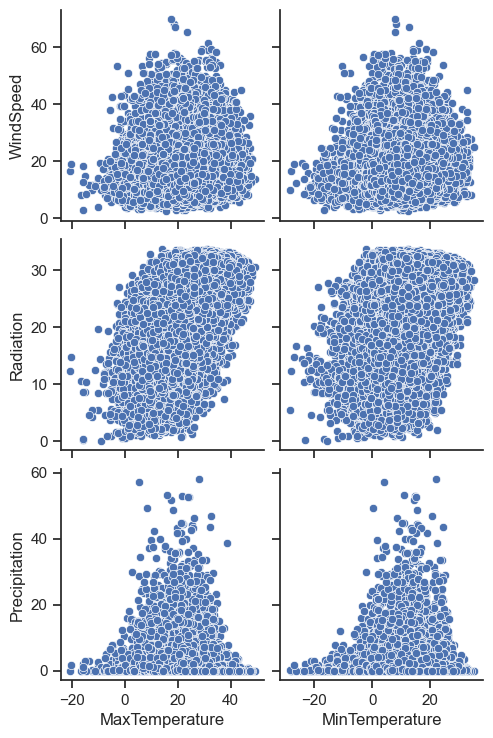

Weather DataFrame description:


,MaxTemperature,MinTemperature,WindSpeed,WindDirection,Radiation,Precipitation
count,83426.000000,83426.000000,83426.000000,83426.000000,83426.000000,83426.000000
mean,25.284182,12.049096,16.399824,204.939539,23.144037,0.863292
std,8.208251,7.476020,6.777346,88.950697,6.159196,2.676969
min,-20.600000,-28.400000,2.400000,0.000000,0.100000,0.000000
25%,19.900000,7.100000,11.600000,154.000000,19.520000,0.000000
50%,26.400000,12.800000,15.000000,218.000000,24.360000,0.000000
75%,31.400000,17.200000,19.800000,271.000000,27.850000,0.400000
max,49.000000,35.000000,69.800000,360.000000,33.750000,58.100000


In [8]:
weather_df = df[WEATHER_COLS].copy()

# Visualize the distribution of weather columns with scatter plots
visualize_distributions(weather_df)

print('Weather DataFrame description:')
weather_df.describe(include = 'all')

In [9]:
df.to_csv(FINAL_CSV, index=False)

### Part 4: Advanced data analysis and EDA

#### Imports section:

In [1]:
# Please note if running on a clean environment, need to install missing modules
from PIL import Image
from IPython.display import display
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
%matplotlib inline

#### Global variables:

In [2]:
CSV_BEFORE = "fire_history_additional.csv"
AFTER_OUTLIERS = 'fire_history_outliers_removed.csv'
AFTER_VALIDATION = 'fire_history_prep.csv'

WEATHER_CSV = 'fire_history_with_weather.csv'
FINAL_CSV = 'fire_history_final.csv'

*Generate a bar plot to visualize the average fire duration by different fire causes*

In [3]:
def bar_fire_cause_duration(df):
    df_bar = df.copy()
    df_bar['FireCause'] = df['FireCause'].map({1: 'Human', 2: 'Natural', 3: 'Unknown', 4: 'Undetermined'})
    df_bar = df_bar.groupby(['FireCause'])['FireDuration'].mean()
    ax = df_bar.plot(kind='bar',
                     title='Fire duration by cause',
                     ylabel='Fire duration in days',
                     xlabel='Fire cause')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()

*Create a scatter plot on a geographic map using the Plotly library and custom parameters*

In [4]:
def scatter_map(df, colors, scopes, sizes):
    fig = px.scatter_geo(lat=df['InitialLatitude'],
                         lon=df['InitialLongitude'],
                         color=colors,
                         projection='natural earth',
                         scope=scopes,
                         opacity=0.5,
                         size=sizes)
    fig.show()

*Generate a pie chart to visualize the distribution of fire causes*

In [5]:
def pie_fire_cause(df):
    fire_cause = df['FireCause'].value_counts().sort_index()
    labels = ['Human', 'Natural', 'Unknown', 'Undetermined']
    fig = plt.pie(fire_cause,
                  explode=(0, 0.1, 0, 0),
                  labels=labels,
                  autopct='%1.1f%%',
                  shadow=True,
                  startangle=90)
    plt.show()

*Create a scatter plot to visualize the relationship between two variables in a DataFrame*

In [6]:
def scatter_fire(df, x, y):
    for value in reversed(df['CausedByWeather'].unique()):
        data = df[df['CausedByWeather'] == value]
        plt.scatter(data[x],
                    data[y],
                    label=0,
                    s=data['FireDuration'],
                    alpha=0.5)
    plt.legend(['Other', 'Natural'], title='Cause')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

### Implementation section:

##### Pre-outliers cleaning EDA:

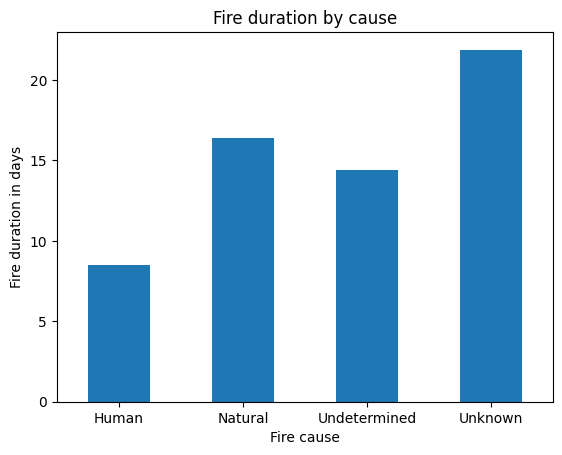

In [7]:
df_before = pd.read_csv(CSV_BEFORE)
bar_fire_cause_duration(df_before)

##### After outliers cleaning EDA:

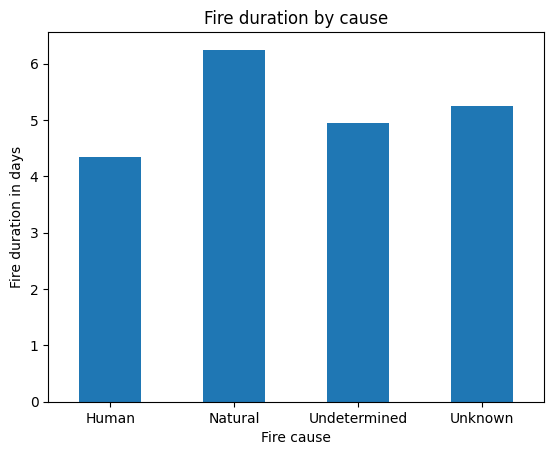

In [8]:
after_outliers = pd.read_csv(AFTER_OUTLIERS)
bar_fire_cause_duration(after_outliers)

##### Pre-coordinates validation EDA:
*Unfortunately, the weight of the map affects the response time of the notebook. Therefore the display appears as a screenshot and not as a real-time map.*

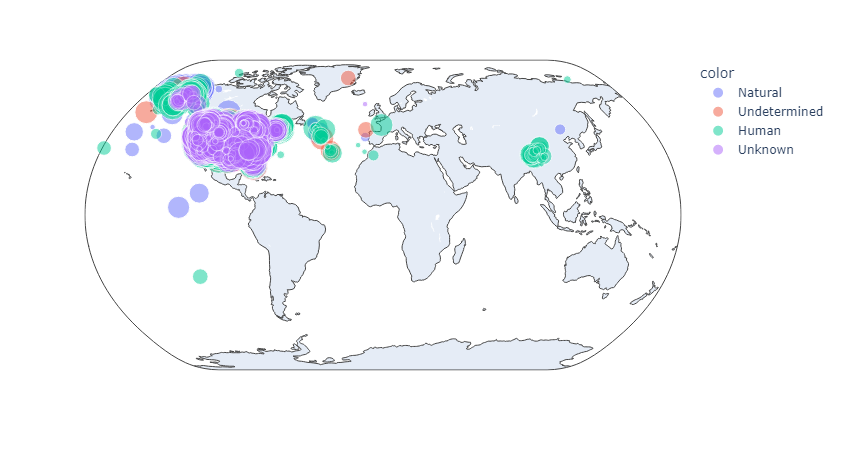

In [9]:
colors = after_outliers['FireCause'].map({1: 'Human', 2: 'Natural', 3: 'Unknown', 4: 'Undetermined'})
scopes = None
sizes = after_outliers['FireDuration']

#scatter_map(after_outliers, colors, scopes, sizes)
display(Image(filename='after_outliers.png'))

#####  After coordinates validation EDA:

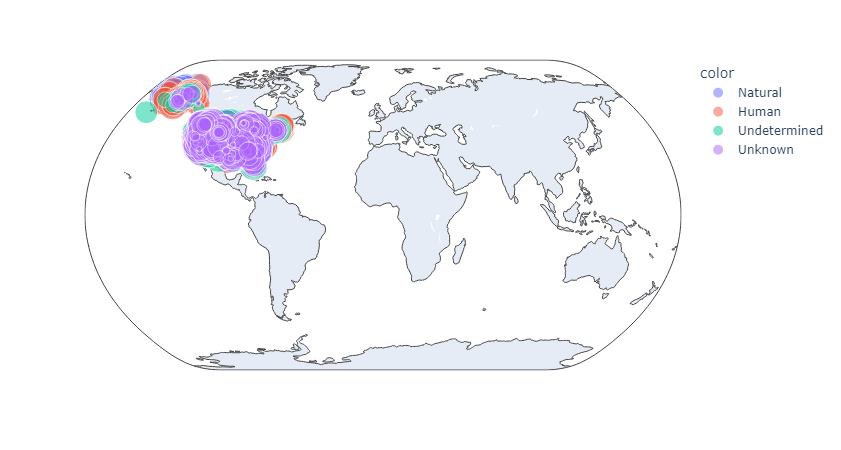

In [10]:
after_validation = pd.read_csv(AFTER_VALIDATION)

colors = after_validation['FireCause'].map({1: 'Human', 2: 'Natural', 3: 'Unknown', 4: 'Undetermined'})
scopes = None
sizes = after_validation['FireDuration']

#scatter_map(after_validation, colors, scopes, sizes)
display(Image(filename='after_validation.png'))

#### EDA analysis:
*Let's take a closer look on our map*

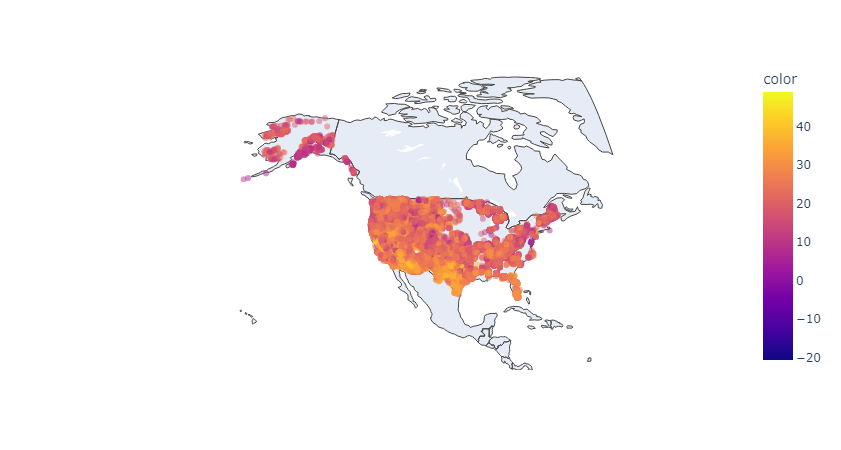

In [11]:
fire_weather_locations = pd.read_csv(WEATHER_CSV)

colors = fire_weather_locations['MaxTemperature']
scopes = 'north america'
sizes = None

#scatter_map(fire_weather_locations, colors, scopes, sizes)
display(Image(filename='after_validation_zoomin.png'))

*Who or what is the main cause of most fires?*

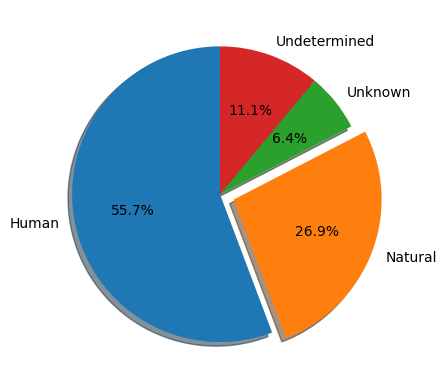

In [12]:
df_final = pd.read_csv(FINAL_CSV)
pie_fire_cause(df_final)

*Is there a relationship between the amount of precipitation and the maximum temperature?*

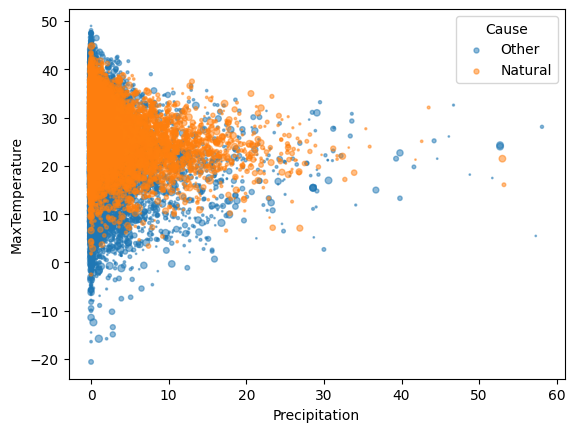

In [13]:
scatter_fire(df_final, 'Precipitation', 'MaxTemperature')

*Is there a relationship between the wind speed and the maximum temperature?*

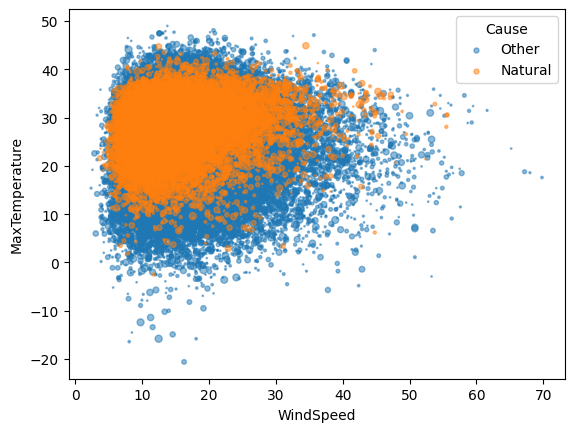

In [14]:
scatter_fire(df_final, 'WindSpeed', 'MaxTemperature')

*Is there a relationship between the amount of precipitation and the wind speed?*

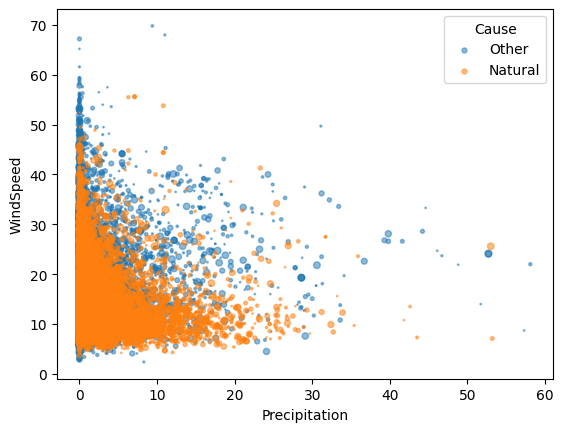

In [15]:
scatter_fire(df_final, 'Precipitation', 'WindSpeed')

*Is there a relationship between the amount of radiation and the maximum temperature?*

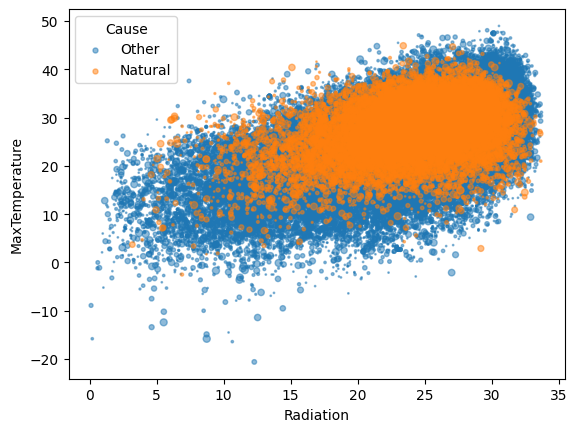

In [16]:
scatter_fire(df_final, 'Radiation', 'MaxTemperature')

### Part 5: Machine Learning
The machine learning section utilizes historical data that we gathered to make accurate predictions (as much as possible) about future fire occurrences. 
In this section, several algorithms are used in order to see how accurately we can forecast the likelihood of forest fires.

#### Imports section:

In [3]:
# Please note if running on a clean environment, need to install missing modules
import pandas as pd
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image, display

#### Global variables:

In [4]:
FINAL_CSV = 'fire_history_final.csv'

COLS_TO_ANALYZE = ['Month', 'InitialLatitude', 'InitialLongitude', 'POOCounty', 'FireDuration', 'CausedByWeather',
                   'MaxTemperature', 'MinTemperature', 'WindSpeed', 'WindDirection', 'Radiation', 'Precipitation']

#### Preparing the data for the algorithms:

In [5]:
def prepare_for_pred(df, target):
    df_predict = df.copy()
    df_predict['Month'] = pd.DatetimeIndex(df_predict['FireDiscoveryDateTime']).month
    df_predict = df_predict[COLS_TO_ANALYZE]
    
    # Convert categorical columns to numerical using one-hot encoding
    #df_predict = pd.get_dummies(df_predict, columns=['POOCounty'])
    df_predict['POOCounty'] = LabelEncoder().fit_transform(df_predict['POOCounty'])
    
    # Split the data into features and target
    X = df_predict.drop([target], axis=1)
    y = df_predict[target]

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return(X_train, X_test, y_train, y_test)

*The `display_accuracy()` function is used to display the accuracy of predicted labels compared to the actual labels.*

In [12]:
def display_accuracy(y_test, y_pred):
    result = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
    result["Prediction"] = result["Actual"] == result["Predicted"]
    display(result)

*The `random_forest_clf()` function trains a Random Forest Classifier model and evaluates its accuracy on both the training and testing data.*

In [7]:
def random_forest_clf(df, target, accuracy):
    X_train, X_test, y_train, y_test = prepare_for_pred(df, target)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    y_pred_train = rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    y_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    print('Accuracy on train data:', train_accuracy)
    print('Accuracy on test data:', test_accuracy)

    if accuracy == True:
        display_accuracy(y_test, y_pred)

*The `decision_tree_clf()` function trains a Decision Tree Classifier model and evaluates its accuracy on both the training and testing data, and generates a visualization of the decision tree.*

In [21]:
def decision_tree_clf(df, target, accuracy):
    X_train, X_test, y_train, y_test = prepare_for_pred(df, target)
    dt_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=10)
    dt_clf.fit(X_train, y_train)

    y_pred_train = dt_clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    y_pred = dt_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    print('Accuracy on train data:', train_accuracy)
    print('Accuracy on test data:', test_accuracy)

    features = COLS_TO_ANALYZE.copy()
    features.remove(target)

    dot_data = export_graphviz(dt_clf, out_file=None, feature_names=features, class_names=['Other', 'Natural'], filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    display(Image(graph.create_png()))

    if accuracy == True:
        display_accuracy(y_test, y_pred)

*The `naive_bayes_clf()` function trains a Naive Bayes Classifier model and evaluates its accuracy on both the training and testing data.*

In [9]:
def naive_bayes_clf(df, target, accuracy):
    X_train, X_test, y_train, y_test = prepare_for_pred(df, target)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    y_pred_train = gnb.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    y_pred = gnb.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    print('Accuracy on train data:', train_accuracy)
    print('Accuracy on test data:', test_accuracy)

    if accuracy == True:
        display_accuracy(y_test, y_pred)

#### Implementation section:

In [10]:
df = pd.read_csv(FINAL_CSV)
df

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause,FireDuration,CausedByWeather,MaxTemperature,MinTemperature,WindSpeed,WindDirection,Radiation,Precipitation
0,2022-COUMA-000926,2022-08-09,2022-08-15,37.178610,-108.889100,Montezuma,2,6,1,33.4,19.2,21.1,311.0,27.67,0.0
1,2022-PAPAS-001588,2022-11-09,2022-11-10,41.700000,-79.031000,Warren,1,1,0,14.1,2.1,15.9,326.0,11.43,0.0
2,2022-ORNOD-220301,2022-08-17,2022-08-17,43.831530,-122.733900,Lane,1,0,0,35.0,14.2,12.8,86.0,24.29,0.0
3,2022-ORNOD-220285,2022-08-13,2022-08-14,43.837670,-122.773600,Lane,1,1,0,26.3,11.8,13.1,140.0,26.21,0.0
4,2022-ORBENN-000436,2022-07-26,2022-07-26,44.007700,-121.223700,Deschutes,1,0,0,37.2,17.1,11.6,131.0,30.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83421,2023-IDBOD-000349,2023-06-18,2023-06-20,43.330760,-116.409500,Ada,1,2,0,25.8,14.3,19.6,274.0,19.84,1.9
83422,2023-CASNF-000573,2023-06-18,2023-06-19,37.568056,-119.843889,Mariposa,4,1,0,26.0,13.7,12.2,223.0,28.97,0.0
83423,2023-AZA5S-230819,2023-06-18,2023-06-19,35.892840,-114.087600,Mohave,1,1,0,33.2,20.5,26.1,195.0,31.45,0.0
83424,2023-AZA3S-230824,2023-06-19,2023-06-19,32.645000,-111.392900,Pinal,1,0,0,39.4,24.3,29.1,225.0,30.54,0.0


Random Forest Classifier model targeting the `'CausedByWeather'` column

In [13]:
# Specify the target for prediction
target = 'CausedByWeather'
random_forest_clf(df, target, True)

Accuracy on train data: 0.9999550494456099
Accuracy on test data: 0.8849334771664868


,Actual,Predicted,Prediction
34932,0,1,False
74424,0,0,True
60302,0,0,True
31405,0,0,True
14326,0,0,True
...,...,...,...
37531,0,0,True
64125,1,0,False
11861,0,1,False
39004,0,0,True


Decision Tree Classifier model targeting the `'CausedByWeather'` column

Accuracy on train data: 0.8122864848666467
Accuracy on test data: 0.81445523193096


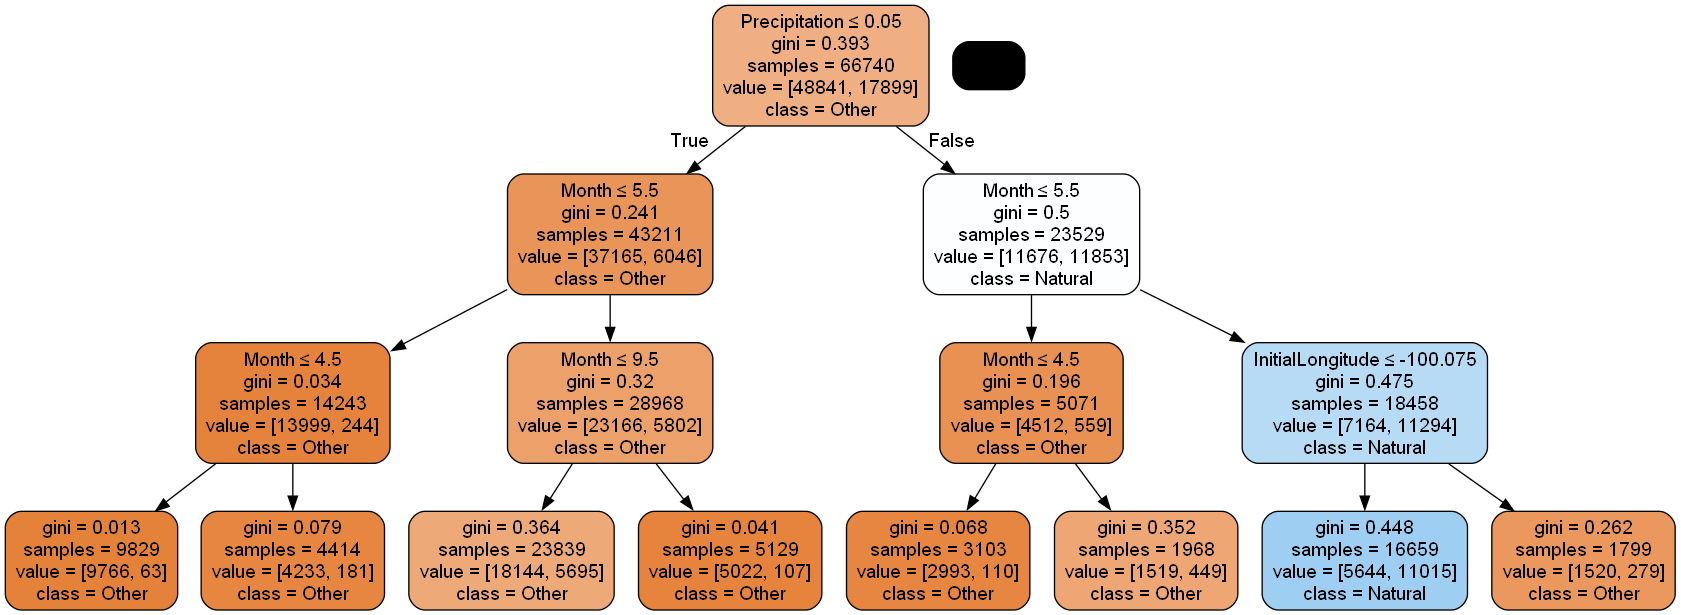

,Actual,Predicted,Prediction
34932,0,1,False
74424,0,0,True
60302,0,0,True
31405,0,0,True
14326,0,1,False
...,...,...,...
37531,0,0,True
64125,1,0,False
11861,0,1,False
39004,0,0,True


In [22]:
# Specify the target for prediction
target = 'CausedByWeather'
decision_tree_clf(df, target, True)

Random Forest Classifier model targeting the `'POOCounty'` column

In [15]:
# Specify the target for prediction
target = 'POOCounty'
random_forest_clf(df, target, False)

Accuracy on train data: 1.0
Accuracy on test data: 0.8489751887810141


Naive Bayes Classifier model targeting the `'POOCounty'` column

In [16]:
# Specify the target for prediction
target = 'POOCounty'
naive_bayes_clf(df, target, True)

Accuracy on train data: 0.6735990410548397
Accuracy on test data: 0.6449718326740981


,Actual,Predicted,Prediction
34932,136,173,False
74424,343,324,False
60302,448,448,True
31405,848,848,True
14326,243,204,False
...,...,...,...
37531,347,361,False
64125,177,177,True
11861,222,128,False
39004,173,504,False
